# PRNP Tree Rendering

In [2]:
import ete3
from ete3 import Tree

/Users/katie/anaconda3/envs/ete3/lib/python3.12/site-packages/ete3-3.1.3-py3.10.egg/ete3/coretype/tree.py:365: SyntaxWarning: invalid escape sequence '\-'
/Users/katie/anaconda3/envs/ete3/lib/python3.12/site-packages/ete3-3.1.3-py3.10.egg/ete3/coretype/tree.py:436: SyntaxWarning: invalid escape sequence '\-'
/Users/katie/anaconda3/envs/ete3/lib/python3.12/site-packages/ete3-3.1.3-py3.10.egg/ete3/coretype/tree.py:1508: SyntaxWarning: invalid escape sequence '\-'
/Users/katie/anaconda3/envs/ete3/lib/python3.12/site-packages/ete3-3.1.3-py3.10.egg/ete3/coretype/tree.py:365: SyntaxWarning: invalid escape sequence '\-'
/Users/katie/anaconda3/envs/ete3/lib/python3.12/site-packages/ete3-3.1.3-py3.10.egg/ete3/coretype/tree.py:436: SyntaxWarning: invalid escape sequence '\-'
/Users/katie/anaconda3/envs/ete3/lib/python3.12/site-packages/ete3-3.1.3-py3.10.egg/ete3/coretype/tree.py:1508: SyntaxWarning: invalid escape sequence '\-'
/Users/katie/anaconda3/envs/ete3/lib/python3.12/site-packages/ete3-3

In [3]:
PRNP_tree = Tree("prion_research/PRNPprotein/aligned_PRNPprotein.tree")
PRNP_tree.render("PRNP_protein.png", w=115, units="mm")

{'nodes': [[0.7746774040779467,
   180.08828777924523,
   6.9720966367015205,
   186.2857070118688,
   0,
   None],
  [5.424248592168704,
   147.91496684113298,
   11.621667824792278,
   154.11238607375657,
   1,
   None],
  [64.85673158809008,
   120.75284036064998,
   71.05415082071366,
   126.95025959327356,
   2,
   None],
  [111.11256670020383,
   94.31697394649004,
   117.3099859328274,
   100.51439317911361,
   3,
   None],
  [115.76213788829459,
   69.33362766497625,
   121.95955712091816,
   75.53104689759982,
   4,
   None],
  [134.95047127545453,
   37.9591927998194,
   141.14789050807812,
   44.15661203244298,
   5,
   None],
  [139.6000424635453,
   17.04290288971483,
   145.79746169616885,
   23.24032212233841,
   6,
   None],
  [166.28452487551291,
   7.746774040779469,
   172.4819441081365,
   13.944193273403044,
   7,
   None],
  [173.78670095481291,
   26.339031738650196,
   179.98412018743647,
   32.53645097127377,
   8,
   None],
  [166.27729241012213,
   58.8754827

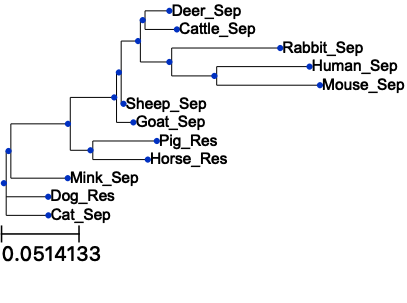

In [4]:
from IPython.display import Image
Image("PRNP_protein.png")

# Cyt-B Tree Rendering

In [5]:
PRNP_tree = Tree("prion_research/Cytb_sequences/aligned_cytb.tree")
PRNP_tree.render("Cytb_protein.png", w=115, units="mm")

{'nodes': [[0.7866415338706564,
   177.6334913671676,
   7.079773804835908,
   183.92662363813284,
   0,
   None],
  [28.765574834421457,
   139.72720245377533,
   35.05870710538671,
   146.0203347247406,
   1,
   None],
  [38.412491513962706,
   111.11311665923022,
   44.70562378492796,
   117.40624893019546,
   2,
   None],
  [65.01840027696178,
   82.20404028948359,
   71.31153254792703,
   88.49717256044885,
   3,
   None],
  [83.78006891301925,
   52.70498276933398,
   90.0732011839845,
   58.998115040299226,
   4,
   None],
  [95.19068848177302,
   31.465661354826256,
   101.48382075273828,
   37.758793625791505,
   5,
   None],
  [109.38045177938665,
   17.30611374515444,
   115.6735840503519,
   23.599246016119693,
   6,
   None],
  [207.78400108686012,
   7.866415338706564,
   214.07713335782535,
   14.159547609671815,
   7,
   None],
  [161.36350248012158,
   26.745812151602316,
   167.65663475108684,
   33.03894442256757,
   8,
   None],
  [312.2966889466505,
   45.625208964

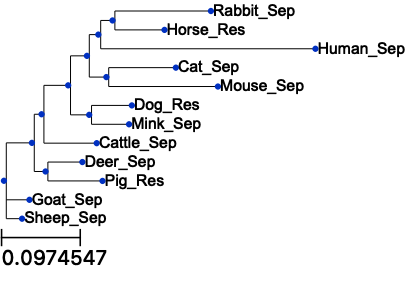

In [6]:
from IPython.display import Image
Image("Cytb_protein.png")

## Calculating Distance Ratio for Species Pairwise (PRNP : Ref Cyt-b)

In [7]:
from ete3 import Tree

#Input newick file containing phylogeny for aligned sequences
t = ete3.Tree("prion_research/PRNPprotein/aligned_PRNPprotein.tree")
t2 = ete3.Tree("prion_research/Cytb_sequences/aligned_cytb.tree")

In [8]:
#Make a list of a susceptible species by leaf
sep_species_list = []
for leaf in t.iter_leaf_names():
    if "Sep" in leaf:
        sep_species_list.append(leaf)
        
#Make a list of all resistant species by leaf
res_species_list = []
for leaf in t.iter_leaf_names():
    if "Res" in leaf:
        res_species_list.append(leaf)

In [9]:
def get_distance_ratio(species_list,tree1,tree2):
    """Return a list of the ratios of  pairwise distances between species in a species list on two phylogentic trees. 
    species_list --- list of species strings
    tree --- one ete3 tree object
    tree2 --- second ete3 tree object"""

    ratios = []

    species_pairs = [(a, b) for idx, a in enumerate(species_list) for b in species_list[idx + 1:]]
    for a, b in species_pairs:
        pairwise_distance1 = tree1.get_distance(a,b)
        pairwise_distance2 = tree2.get_distance(a,b)
        ratio = pairwise_distance1/pairwise_distance2
        ratios.append(ratio)
    
    return ratios

In [10]:
sep_distance_ratio = get_distance_ratio(sep_species_list,t,t2)
res_distance_ratio = get_distance_ratio(res_species_list,t,t2)

In [11]:
from scipy.stats import ttest_ind

#Run a t-test on the results
susceptibility_ttest = ttest_ind(sep_distance_ratio,res_distance_ratio)
print(susceptibility_ttest)

TtestResult(statistic=-0.4338024538303159, pvalue=0.6669509038339806, df=37.0)
